In [26]:
import numpy
import matplotlib
#matplotlib.use('Agg')
from scipy.cluster.vq import *
import pylab
pylab.close()
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import os
import graphlab as gl

if os.path.exists('schizophrenia_clean'):
    sf = gl.SFrame('schizophrenia_clean')
else:
    sf_functional = gl.SFrame.read_csv(
        'http://s3.amazonaws.com/dato-datasets/mlsp_2014/train_FNC.csv')
    sf_morphometry = gl.SFrame.read_csv(
        'http://s3.amazonaws.com/dato-datasets/mlsp_2014/train_SBM.csv')

    sf = sf_functional.join(sf_morphometry, on="Id")
    sf = sf.remove_column('Id')   

    sf.save('schizophrenia_clean')

In [8]:
train, test = sf.random_split(0.8)
print train.head()

+----------+----------+----------+----------+-----------+------------+-----------+
|   FNC1   |   FNC2   |   FNC3   |   FNC4   |    FNC5   |    FNC6    |    FNC7   |
+----------+----------+----------+----------+-----------+------------+-----------+
| 0.34312  | 0.045761 | -0.13112 | 0.15034  |  0.18082  |  0.28916   |  0.069545 |
|  0.2879  | 0.10257  | -0.32343 | -0.22776 |  0.12328  |  0.36702   |  -0.08404 |
| 0.24585  | 0.21662  | -0.12468 | -0.3538  |   0.1615  | -0.0020318 |  -0.13302 |
|  0.4209  | 0.33138  | 0.24453  | 0.17167  |  0.59223  |  0.43105   |  0.28029  |
| -0.14621 | -0.46863 | -0.5288  | -0.50381 |  -0.51052 | -0.029113  | -0.015192 |
| 0.55836  | 0.35646  | 0.35729  | 0.28911  |   0.2762  |  0.44263   |  0.31844  |
|  0.113   | -0.43457 | -0.71167 | -0.70187 |  0.12693  |  -0.39747  |  -0.47699 |
| 0.40232  | 0.06261  | 0.36089  | 0.18163  |  0.41605  |  -0.26195  |  0.033917 |
| -0.18005 | -0.43638 | -0.73401 | -0.77518 |  -0.50201 |   0.1553   |  -0.6134  |
| 0.

In [5]:
from math import sqrt
K = int(sqrt(len(xy)/2.0))
kmeans_model = gl.kmeans.create(train, num_clusters=K)

PROGRESS: Initializing data.
PROGRESS: Batch size is larger than the input dataset. Switching to an exact Kmeans method.
PROGRESS: Choosing initial cluster centers with Kmeans++.
PROGRESS: +---------------+-----------+
PROGRESS: | Center number | Row index |
PROGRESS: +---------------+-----------+
PROGRESS: | 0             | 16        |
PROGRESS: | 1             | 58        |
PROGRESS: | 2             | 1         |
PROGRESS: | 3             | 15        |
PROGRESS: +---------------+-----------+
PROGRESS: Starting kmeans model training.
PROGRESS: Assigning points to initial cluster centers.
PROGRESS: +-----------+-------------------------------+
PROGRESS: | Iteration | Number of changed assignments |
PROGRESS: +-----------+-------------------------------+
PROGRESS: | 1         | 3                             |
PROGRESS: | 2         | 1                             |
PROGRESS: | 3         | 1                             |
PROGRESS: | 4         | 0                             |
PROGRESS: +-

In [9]:
gl.canvas.set_target('ipynb')
kmeans_model.show()

In [10]:
kmeans_model['cluster_info'][['cluster_id', 'size', 'sum_squared_distance']]

cluster_id,size,sum_squared_distance
0,28,1545.03027344
1,21,1147.95669556
2,14,719.954227448
3,5,279.447463989


In [81]:
# generate 3 sets of normally distributed points around
# different means with different variances
pt1 = numpy.random.normal(1, 0.2, (1000,2))
pt2 = numpy.random.normal(2, 0.5, (3000,2))
pt3 = numpy.random.normal(3, 0.3, (1000,2))

In [76]:
# slightly move sets 2 and 3 (for a prettier output)
pt2[:,0] += 2 #1
pt3[:,0] -= 2.5 #0.5

In [82]:
xy = numpy.concatenate((pt1, pt2, pt3))

In [90]:
from math import sqrt
K = int(sqrt(len(xy)/2.0))

In [83]:
# kmeans for 3 clusters (centros, cluster )
res, idx = kmeans2(numpy.array(zip(xy[:,0],xy[:,1])),K)

In [84]:
#colors = ([([0.4,1,0.4],[1,0.4,0.4],[0.1,0.8,1],[1,1,0])[i] for i in idx])
colors = ([([0.4,1,0.4],[1,0.4,0.4],[0.1,0.8,1],[1,1,0],
           [0.4,1,1],[1,0.9,0.9],[0.1,0.5,1],[.8,1,0])
           [i] for i in idx])

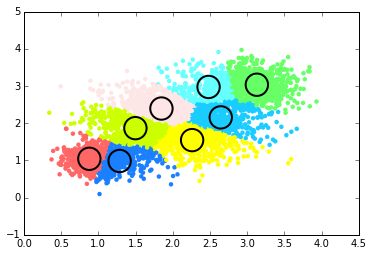

In [85]:
plt.scatter(xy[:,0],xy[:,1], c=colors, edgecolors='none')
plt.scatter(res[:,0],res[:,1], marker='o', s = 500, linewidths=2, c='none')